-------------------- Loaded images --------------------
shape: (12464, 9400, 3) dtype: float64 min--max: 0.106--0.973
shape: (4641, 3626) dtype: float64 min--max: 0.000--1.000


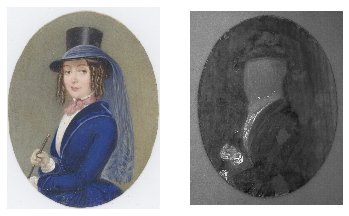

-------------------- Resized images --------------------
shape: (4641, 3500, 3) dtype: float64 min--max: 0.124--0.970
shape: (4641, 3626) dtype: float64 min--max: 0.000--1.000


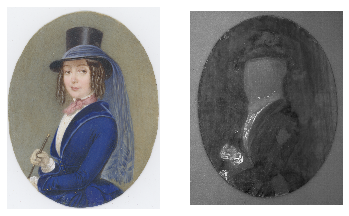

-------------------- Config --------------------
{'downsize': 600,
 'extract_features': {'method': 'HARRIS',
                      'min_distance': 1,
                      'patch_size': 50,
                      'threshold_rel': 1e-07},
 'irr_weight': 0.5,
 'match': {'max_distance': 200},
 'model_robust_param_limits': [[[-10, -1, -100],
                                [-1, -2, -100],
                                [-0.1, -0.02, 0]],
                               [[10, 1, 100], [1, 2, 100], [0.1, 0.02, 2]]],
 'preprocess_images': {'blur_sigma': 1,
                       'edge': 0,
                       'edge_high_threshold': 0.1,
                       'edge_low_threshold': 0.05,
                       'edge_sigma': 2,
                       'equalize': 0,
                       'normalize': 0},
 'ransac': {'max_trials': 10000, 'min_samples': 5, 'residual_threshold': 10}}


In [21]:
'''
FalseVisir - create false color image from visible and infrared image.
- interactive version, usefull to try different parameters

'''

from falsevisir import *
from pprint import pprint
from config import CFG

# Change settings
CFG['preprocess_images']['blur_sigma'] = 1
CFG['downsize'] = 400
CFG['extract_features']['patch_size'] = CFG['downsize'] // 8

# Load images
im_paths = '/home/m/Y/APOLLO/2022/J2206/a349_J2206__TL_90.png', '/home/m/Y/SKENY/VIS/J2206 3200.tif'


vi_path, ir_path = [Path(fp) for fp in reversed(im_paths)]

vi_image, ir_image = [load_image(fp) for fp in (vi_path, ir_path)]
print("-------------------- Loaded images --------------------")
print(info(vi_image))
print(info(ir_image))
show_images((vi_image, ir_image))

# Resize to same height

vi_image, ir_image = resize_images((vi_image, ir_image))
print("-------------------- Resized images --------------------")
print(info(vi_image))
print(info(ir_image))
show_images((vi_image, ir_image))

print("-------------------- Config --------------------")
pprint(CFG)

...warping... downsize to: 800


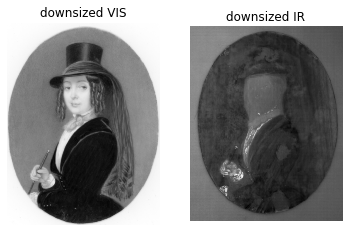

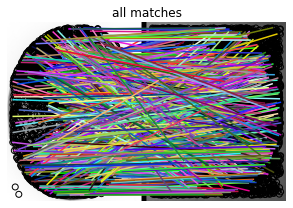

All matches: 816


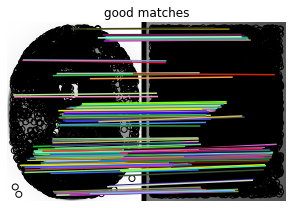

Good matches: 170


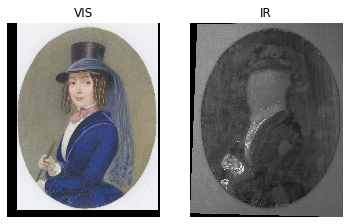

shape: (4830, 3792, 3) dtype: float64 min--max: 0.000--0.957
shape: (4830, 3792, 3) dtype: float64 min--max: 0.000--1.000


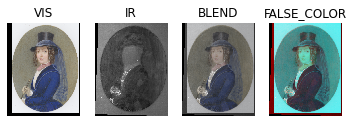

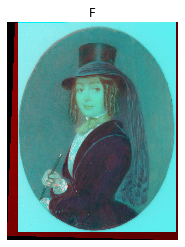

In [31]:
''' Find features without edge detection '''

CFG['preprocess_images']['edge'] = 0           # worse results
CFG['preprocess_images']['normalize'] = 1      # no effect?
CFG['preprocess_images']['blur_sigma'] = 1     # reduce noise -> optimum ~ 1 ?
CFG['preprocess_images']['equalize'] = 0       # no effect?

CFG['downsize'] = 800                          # higher -> longer warping, optimum ~ 500

CFG['ransac']['residual_threshold'] = 20       # higher -> more good matches, optimum ~ 10

#%% Warp images
vi_image_w, ir_image_w = warp_images(vi_image, ir_image, show=True, **CFG)

#%% Blend images
blend_im = blend_image(vi_image_w, ir_image_w, weight=.5)
print(info(blend_im))

#%% False color image
false_im = false_image(vi_image_w, ir_image_w)
print(info(false_im))

#%% Show results
show_images((vi_image_w, ir_image_w, blend_im, false_im), labels=("VIS", "IR", "BLEND", "FALSE_COLOR"))


#%% Show results
show_images(false_im, labels="FALSE_COLOR")

In [32]:
#%% Save results

dst_dir = ir_path.parent / f"false_color_results"
dst_dir.mkdir(exist_ok=True)
print(f"Save to {dst_dir}")

# Blended images
save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_falsecolor.png", false_im)
save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_blend.png", blend_im)
# Warped images
save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_vi_warp.png", vi_image_w)
save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_ir_warp.png", ir_image_w)


Save to /home/m/Y/APOLLO/2022/J2206/false_color_results


In [ ]:
''' Find features with edge detection '''

CFG['preprocess_images']['edge'] = 1
CFG['preprocess_images']['normalize'] = 1
CFG['preprocess_images']['blur_sigma'] = 2
CFG['preprocess_images']['equalize'] = 0

#%% Warp images
vi_image_w, ir_image_w = warp_images(vi_image, ir_image, show=True, **CFG)

#%% Blend images
blend_im = blend_image(vi_image_w, ir_image_w, weight=.5)
print(info(blend_im))

#%% False color image
false_im = false_image(vi_image_w, ir_image_w)
print(info(false_im))

#%% Show results
show_images((vi_image_w, ir_image_w, blend_im, false_im), labels=("VIS", "IR", "BLEND", "FALSE_COLOR"))

In [ ]:
for ch in range(3):
    save_image(dst_dir / f"{ir_path.stem}_{vi_path.stem}_vi_warp_{ch}.png", vi_image_w[:,:,ch])